In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = []

In [102]:
# update the data.csv file with new logs
import re
import os
from pathlib import Path

files = Path('.').glob("*.log")
data = []
if not os.path.isfile('./data.csv'):
    print("[LOG] reading all log files")
    for f in files:
        with f.open() as log:
            text = f.read_text()
            corr = len(re.findall("Correction ->", text))
            forw = len(re.findall("Forward ->", text))
            succ = len(re.findall("Successor \|\|", text))
            init = len(re.findall("init", text))
            data.append([corr, forw, succ, init])

    df = pd.DataFrame(
        data, columns=['Correction', 'Forward', 'Successor', 'init'])
    df.to_csv('data.csv')
else:
    df = pd.read_csv('./data.csv')

In [103]:
# upperbound for the messages count

print(df['Forward'].sum() + df['Correction'].sum()
,df['init'].sum() * 3 * 16)

221937 480000


<AxesSubplot:>

<Figure size 1152x576 with 0 Axes>

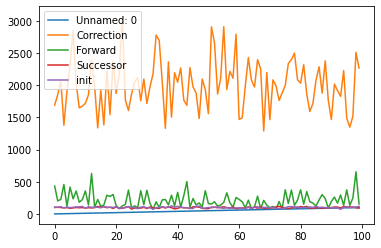

In [104]:
plt.figure(figsize=(16,8))

df.plot()

<AxesSubplot:ylabel='init'>

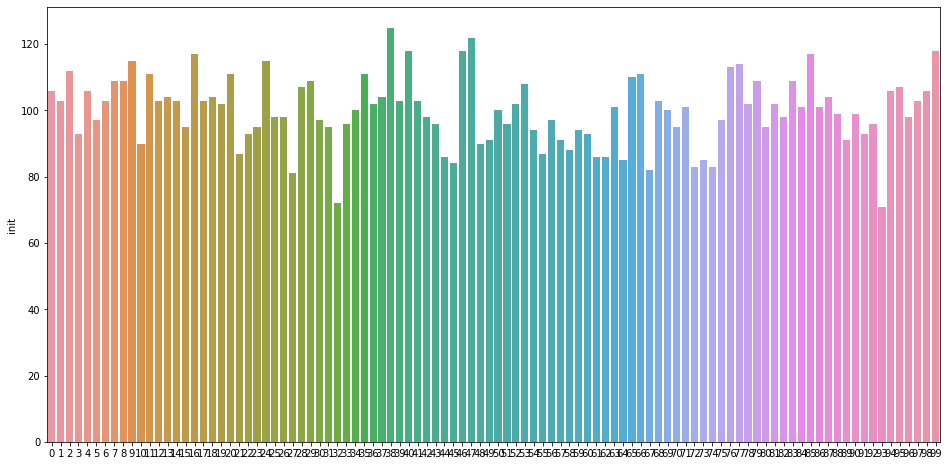

In [105]:
plt.figure(figsize=(16,8))
sns.barplot(x=df.index, y=df['init'])

<AxesSubplot:ylabel='Successor'>

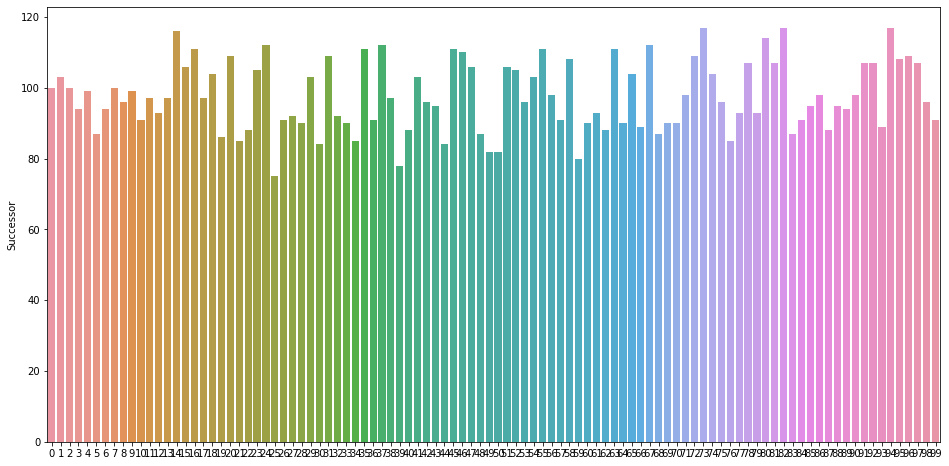

In [106]:
plt.figure(figsize=(16,8))
sns.barplot(x=df.index, y=df['Successor'])

<AxesSubplot:ylabel='Successor'>

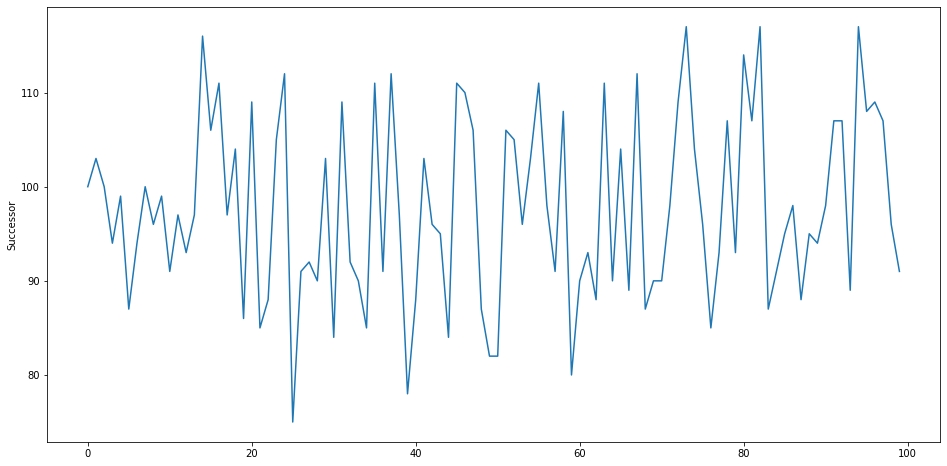

In [107]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df.index, y=df['Successor'])

<AxesSubplot:ylabel='Forward'>

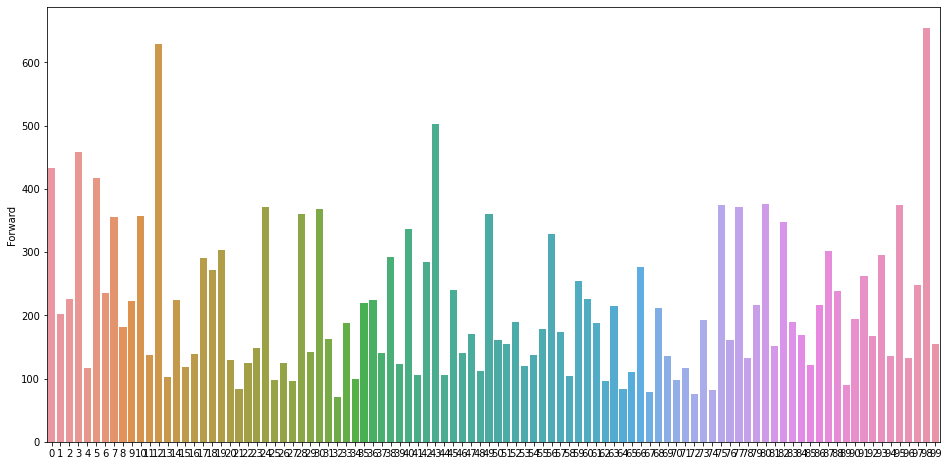

In [108]:
plt.figure(figsize=(16,8))
sns.barplot(x=df.index, y=df['Forward'])

<AxesSubplot:ylabel='Correction'>

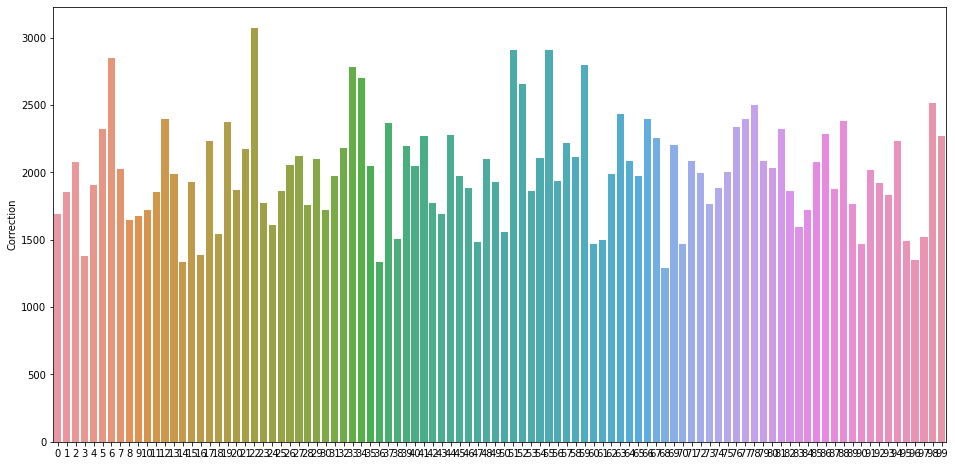

In [109]:
plt.figure(figsize=(16,8))
sns.barplot(x=df.index, y=df['Correction'])

<AxesSubplot:xlabel='Correction', ylabel='Forward'>

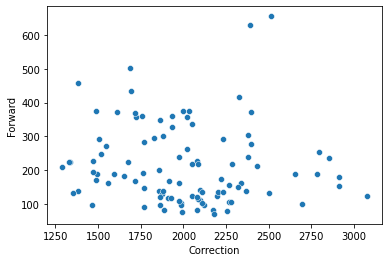

In [110]:
# plt.figure(figsize=(16,8))

sns.scatterplot(x=df['Correction'], y=df['Forward'])


<AxesSubplot:xlabel='init', ylabel='Successor'>

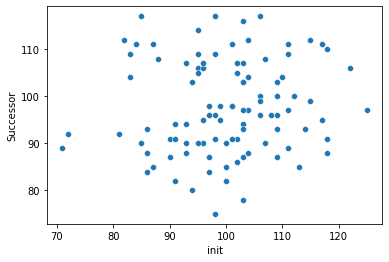

In [111]:
sns.scatterplot(x=df['init'], y=df['Successor'])


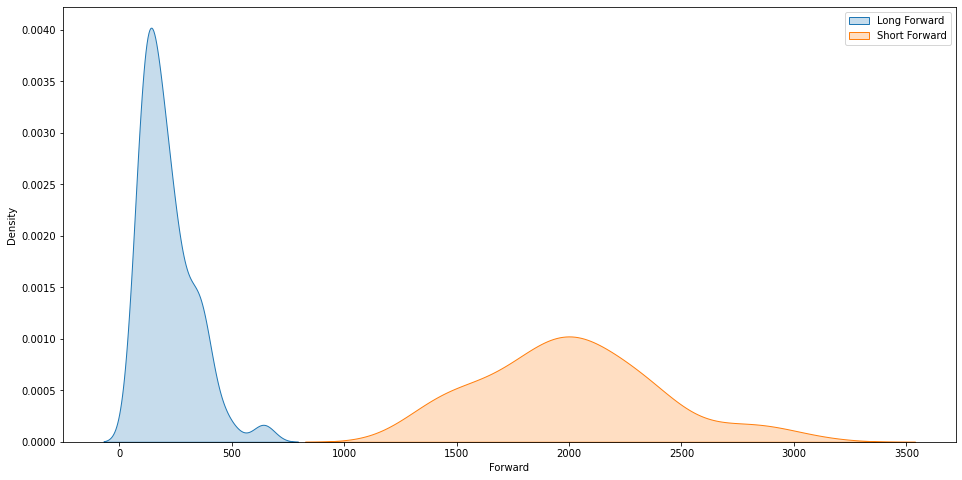

In [112]:
plt.figure(figsize=(16,8))

sns.kdeplot(data=df['Forward'], label="Long Forward", shade=True)
sns.kdeplot(data=df['Correction'], label="Short Forward", shade=True)

plt.legend()

<AxesSubplot:xlabel='init', ylabel='Density'>

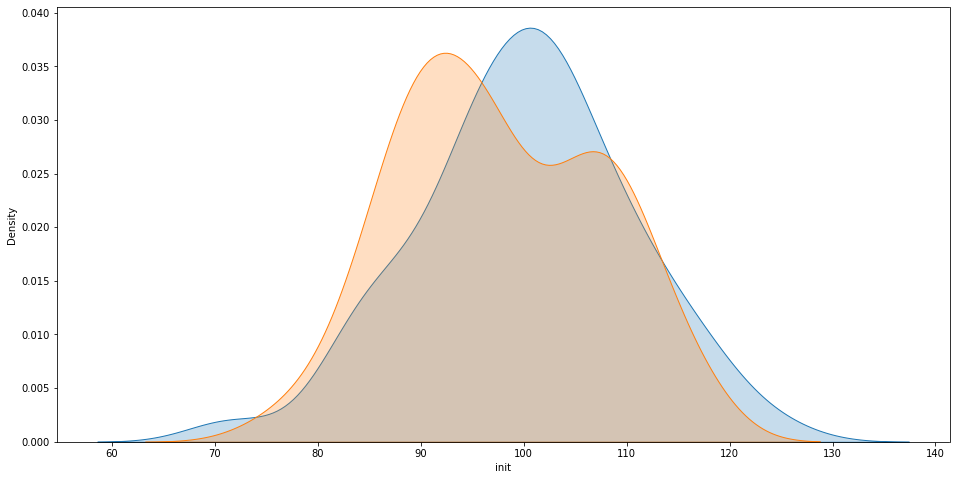

In [113]:
plt.figure(figsize=(16,8))

sns.kdeplot(data=df['init'], shade=True)
sns.kdeplot(data=df['Successor'], shade=True)

# what a surprise !!